# Machine Learning Term Project

## Sihwa Park

## 0. Enviroment.
I used google colab ipython notebook with Python3.

## 1. Task Definition
I found the data from Kaggle(https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). This data is from iOS Appstore which contains information about 7200+ apps. The task I want to do is predicting the app's current rate. The data has general information about app.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AppleStore.csv')

## 2. Dataset Description
In this data set there are 16 attributes and information about 7197 apps.

1. "id" : App ID

2. "track_name": App Name

3. "size_bytes": Size (in Bytes)

4. "currency": 100% USD

5. "price": App Price

6. "rating_count_tot": rating count for all versions of the app

7. "rating_count_ver": rating count for current version of the app

8. "user_rating" : average rating for all versions of the app

**9. "user_rating_ver": average rating for current version of the app - what we want to predict**

10. "ver" : newest version (ex. 10.4.1)

11. "cont_rating": restricted age

12. "prime_genre": genre

13. "sup_devices.num": supporting device number

14. "ipadSc_urls.num": the number of submitted screenshot images about the app (max 5)

15. "lang.num": supporting language

16. "vpp_lic": vpp license enable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [5]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


##2. Preprocessing
###1) row number가 들어가 있는 칼럼, id 칼럼(앱 id, 앱 이름, 최신 version) 을 삭제한다.

In [0]:
df = df.drop(columns=['Unnamed: 0', 'track_name', 'id', 'ver'])

In [7]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


### 2) Delete columns with almost one value while looking at the distribution by column.
For price column the graph looks like one value because differences between values is very small and for rating_count_tot and rating_count_ver, the x interval is quite big so it looks like one value. In fact if we do df.describe() their standard deviation is quite high. By looking at this histogram we will erase columns currency and vpp_lic which has almost same value for all data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f785afaf588>,
      dtype=object)

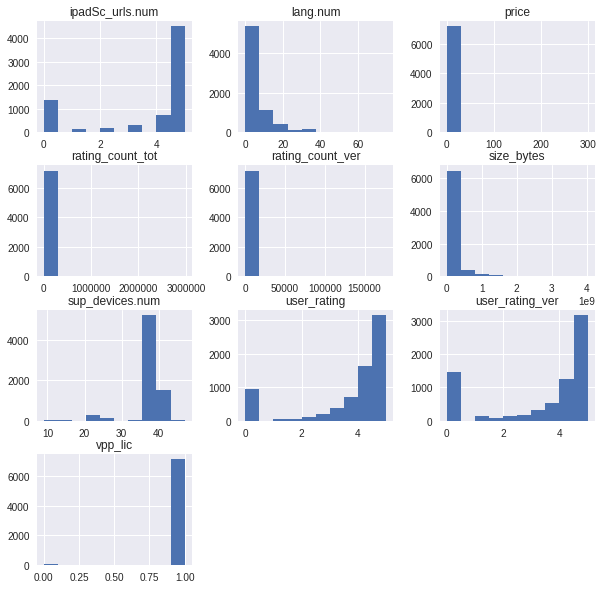

In [8]:
df.hist(figsize=(10, 10))

In [0]:
df = df.drop(columns=['currency', 'vpp_lic'])

### 3) normalize & delete outliers
Normalize columns with continuous values

In [10]:
from sklearn import preprocessing

x = df[['size_bytes']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['size_bytes']] = pd.DataFrame(x_scaled)
x = df[['price']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['price']] = pd.DataFrame(x_scaled)
x = df[['rating_count_tot']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['rating_count_tot']] = pd.DataFrame(x_scaled)
x = df[['rating_count_ver']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['rating_count_ver']] = pd.DataFrame(x_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
x = df[['sup_devices.num']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['sup_devices.num']] = pd.DataFrame(x_scaled)
x = df[['ipadSc_urls.num']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['ipadSc_urls.num']] = pd.DataFrame(x_scaled)
x = df[['lang.num']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['lang.num']] = pd.DataFrame(x_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,0.049323,0.005754,0.004334,0.002600,3.526956,3.253578,0.746364,0.741420,0.072465
std,0.089236,0.019444,0.025461,0.022143,1.517948,1.809363,0.098361,0.397201,0.105595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011510,0.000000,0.000009,0.000006,3.500000,2.500000,0.736842,0.600000,0.013333
50%,0.023989,0.000000,0.000101,0.000130,4.000000,4.000000,0.736842,1.000000,0.013333
75%,0.045048,0.006634,0.000939,0.000791,4.500000,4.500000,0.763158,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000


Consider value bigger than the average +-2*sigma  as outliers

In [0]:
df_new = df.copy()
df_new = df_new.drop(df_new[(df_new["size_bytes"]>0.049323+2*0.089236) | (df_new["size_bytes"]<0.049323-2*0.089236)].index)
df_new = df_new.drop(df_new[(df_new["price"]>0.005754+2*0.019444) | (df_new["price"]<0.005754-2*0.019444)].index)
df_new = df_new.drop(df_new[(df_new["rating_count_tot"]>0.004334+2*0.025461) | (df_new["rating_count_tot"]<0.004334-2*0.025461)].index)
df_new = df_new.drop(df_new[(df_new["rating_count_ver"]>0.002600+2*0.022143) | (df_new["rating_count_ver"]<0.002600-2*0.022143)].index)
df_new = df_new.drop(df_new[(df_new["sup_devices.num"]>0.746364+2*0.098361) | (df_new["sup_devices.num"]<0.746364-2*0.098361)].index)
df_new = df_new.drop(df_new[(df_new["ipadSc_urls.num"]>0.741420+2*0.397201) | (df_new["ipadSc_urls.num"]<0.741420-2*0.397201)].index)
df_new = df_new.drop(df_new[(df_new["lang.num"]>0.072465+2*0.105595) | (df_new["lang.num"]<0.072465-2*0.105595)].index)

In [14]:
df_old = df.copy()
df = df_new.copy()
df_new.shape

(6014, 11)

After deleting outliers, remaining instances are 6014.

In [0]:
df = df.reset_index()

In [0]:
df = df.drop(columns=['index'])

In [17]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,0.024892,0.013300,0.007158,0.000147,4.0,4.5,4+,Games,0.763158,1.0,0.133333
1,0.056443,0.000000,0.040168,0.004965,4.0,4.5,4+,Finance,0.736842,0.0,0.253333
2,0.012088,0.033301,0.000376,0.000023,4.5,5.0,4+,Utilities,0.736842,1.0,0.013333
3,0.017249,0.013300,0.002651,0.000226,4.0,4.0,4+,Games,0.763158,0.0,0.133333
4,0.012180,0.016634,0.025791,0.022689,4.5,4.5,4+,Games,0.763158,0.8,0.146667


### 3) Encoding
We will encode cont_rating and prime_genre column. For cont_rating it goes up like 4+, 17+ by criteria of violent and sexually suggestive, I will convert it to an integer from 0 with interval 1. For prime_gengre, it is difficult to convert every genre in one value, I will just change it to one hot vector. For out target user_rating_ver, now it is float datatype but in fact it has values with 0 to 5 with 0.5 interval. So I will convert it to one hot vector. The task is to predict a value with 0.5 interval I consider this task as classification not regression. Hence in the end I thought the model choose one rate using softmax.

In [0]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 11 columns):
size_bytes          6014 non-null float64
price               6014 non-null float64
rating_count_tot    6014 non-null float64
rating_count_ver    6014 non-null float64
user_rating         6014 non-null float64
user_rating_ver     6014 non-null float64
cont_rating         6014 non-null object
prime_genre         6014 non-null object
sup_devices.num     6014 non-null float64
ipadSc_urls.num     6014 non-null float64
lang.num            6014 non-null float64
dtypes: float64(9), object(2)
memory usage: 516.9+ KB


In [20]:
df.iloc[0, 6]

'4+'

In [0]:
for index, row in df.iterrows():
  df.iloc[index, 6] = int(df.iloc[index, 6][:-1])

In [22]:
df['cont_rating']

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       9
15       4
16       4
17      12
18       4
19       4
20       9
21       4
22      17
23       9
24       4
25      12
26       4
27       4
28       4
29       9
        ..
5984     4
5985     4
5986     4
5987     4
5988     9
5989     4
5990     4
5991     4
5992     4
5993     4
5994     4
5995     4
5996     4
5997     9
5998     9
5999     4
6000     9
6001     9
6002     9
6003     4
6004     4
6005    12
6006     9
6007     4
6008    17
6009     4
6010     4
6011     9
6012    12
6013     4
Name: cont_rating, Length: 6014, dtype: int64

In [23]:
ord_enc = OrdinalEncoder()
ord_enc.fit(df[['cont_rating']])
ord_enc.categories_

[array([ 4,  9, 12, 17])]

In [24]:
df['cont_rating'] = ord_enc.transform(df[['cont_rating']])
df.cont_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      1.0
15      0.0
16      0.0
17      2.0
18      0.0
19      0.0
20      1.0
21      0.0
22      3.0
23      1.0
24      0.0
25      2.0
26      0.0
27      0.0
28      0.0
29      1.0
       ... 
5984    0.0
5985    0.0
5986    0.0
5987    0.0
5988    1.0
5989    0.0
5990    0.0
5991    0.0
5992    0.0
5993    0.0
5994    0.0
5995    0.0
5996    0.0
5997    1.0
5998    1.0
5999    0.0
6000    1.0
6001    1.0
6002    1.0
6003    0.0
6004    0.0
6005    2.0
6006    1.0
6007    0.0
6008    3.0
6009    0.0
6010    0.0
6011    1.0
6012    2.0
6013    0.0
Name: cont_rating, Length: 6014, dtype: float64

In [25]:
df['prime_genre'].value_counts()

Games                3238
Entertainment         468
Education             365
Photo & Video         290
Utilities             207
Health & Fitness      153
Lifestyle             131
Productivity          129
Social Networking     129
Shopping              110
Book                  106
Sports                102
Music                  97
Finance                95
News                   68
Travel                 67
Weather                58
Food & Drink           56
Reference              43
Business               41
Navigation             36
Medical                15
Catalogs               10
Name: prime_genre, dtype: int64

총 22개의 장르

In [0]:
onehot_enc = OneHotEncoder()
onehot_enc.fit(df[['prime_genre']])
prime_df = pd.DataFrame(data = onehot_enc.fit_transform(df[['prime_genre']]).toarray(), columns=["genre_"+str(int(i)) for i in range(0, 23)])

In [0]:
df = pd.concat((df, prime_df), axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 34 columns):
size_bytes          6014 non-null float64
price               6014 non-null float64
rating_count_tot    6014 non-null float64
rating_count_ver    6014 non-null float64
user_rating         6014 non-null float64
user_rating_ver     6014 non-null float64
cont_rating         6014 non-null float64
prime_genre         6014 non-null object
sup_devices.num     6014 non-null float64
ipadSc_urls.num     6014 non-null float64
lang.num            6014 non-null float64
genre_0             6014 non-null float64
genre_1             6014 non-null float64
genre_2             6014 non-null float64
genre_3             6014 non-null float64
genre_4             6014 non-null float64
genre_5             6014 non-null float64
genre_6             6014 non-null float64
genre_7             6014 non-null float64
genre_8             6014 non-null float64
genre_9             6014 non-null float64
genre_10    

In [0]:
df = df.drop(columns=['prime_genre'])

First of all, change rate to integer using labelEncoder and then make it to one hot vector.

In [30]:
label_enc = LabelEncoder()
label_enc.fit(df[['user_rating_ver']])
label_enc.classes_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [31]:
df['user_rating_ver_new'] = label_enc.transform(df[['user_rating_ver']])
df.user_rating_ver_new

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0       8
1       8
2       9
3       7
4       8
5       4
6       8
7       8
8       8
9       9
10      8
11      0
12      7
13      7
14      6
15      6
16      8
17      9
18      0
19      9
20      4
21      7
22      0
23      5
24      9
25      7
26      0
27      8
28      0
29      7
       ..
5984    0
5985    9
5986    1
5987    7
5988    9
5989    9
5990    8
5991    0
5992    6
5993    0
5994    7
5995    0
5996    5
5997    9
5998    0
5999    0
6000    7
6001    0
6002    0
6003    3
6004    8
6005    7
6006    0
6007    5
6008    0
6009    8
6010    8
6011    0
6012    8
6013    9
Name: user_rating_ver_new, Length: 6014, dtype: int64

In [32]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,...,genre_14,genre_15,genre_16,genre_17,genre_18,genre_19,genre_20,genre_21,genre_22,user_rating_ver_new
0,0.024892,0.013300,0.007158,0.000147,4.0,4.5,0.0,0.763158,1.0,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.056443,0.000000,0.040168,0.004965,4.0,4.5,0.0,0.736842,0.0,0.253333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.012088,0.033301,0.000376,0.000023,4.5,5.0,0.0,0.736842,1.0,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
3,0.017249,0.013300,0.002651,0.000226,4.0,4.0,0.0,0.763158,0.0,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.012180,0.016634,0.025791,0.022689,4.5,4.5,0.0,0.763158,0.8,0.146667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


For later, I stored target classified as ordinal.

In [0]:
train = df.sample(frac=0.6)
valid_old = df.drop(index=train.index)
valid = valid_old.sample(frac=0.5)
test = valid_old.drop(index=valid.index)
train_x = train.drop(columns=['user_rating_ver', 'user_rating_ver_new'])
train_y = train[[ 'user_rating_ver_new']]
train_ordinal_y = train[[ 'user_rating_ver_new']]
valid_x = valid.drop(columns=['user_rating_ver', 'user_rating_ver_new'])
valid_y = valid[[ 'user_rating_ver_new']]
valid_ordinal_y = valid[[ 'user_rating_ver_new']]
test_x = test.drop(columns=['user_rating_ver', 'user_rating_ver_new'])
test_y = test[[ 'user_rating_ver_new']]
test_ordinal_y = test[[ 'user_rating_ver_new']]

In [34]:
onehot_enc = OneHotEncoder()
onehot_enc.fit(df[['user_rating_ver_new']])
user_rating_ver_df = pd.DataFrame(data = onehot_enc.fit_transform(train_y[['user_rating_ver_new']]).toarray(), columns=["user_rating_ver_new_"+str(int(i)) for i in range(0, 10)])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
train_y = user_rating_ver_df

In [36]:
user_rating_ver_df = pd.DataFrame(data = onehot_enc.fit_transform(test_y[['user_rating_ver_new']]).toarray(), columns=["user_rating_ver_new_"+str(int(i)) for i in range(0, 10)])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
test_y = user_rating_ver_df

In [38]:
user_rating_ver_df = pd.DataFrame(data = onehot_enc.fit_transform(valid_y[['user_rating_ver_new']]).toarray(), columns=["user_rating_ver_new_"+str(int(i)) for i in range(0, 10)])
valid_y = user_rating_ver_df

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## 3. First Experiment
Except baseline model, I will use four models.(Linear Regression, Decision Tree, Random Forest, MLP(DL))

In sklearn, supporting multilabel models are following 8 models.

sklearn.tree.DecisionTreeClassifier

sklearn.tree.ExtraTreeClassifier

sklearn.ensemble.ExtraTreesClassifier

sklearn.neighbors.KNeighborsClassifier

sklearn.neural_network.MLPClassifier

sklearn.neighbors.RadiusNeighborsClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.linear_model.RidgeClassifierCV

I chose 4 models out of 8.

### 1) Baseline
I made oneR algorithm for baseline model.
Each result of experiment of one model will be stored in result dataframe.

In [0]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
result = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1'])

In [40]:
train_y.sum()

user_rating_ver_new_0     812.0
user_rating_ver_new_1      77.0
user_rating_ver_new_2      39.0
user_rating_ver_new_3      79.0
user_rating_ver_new_4      91.0
user_rating_ver_new_5     154.0
user_rating_ver_new_6     234.0
user_rating_ver_new_7     564.0
user_rating_ver_new_8    1048.0
user_rating_ver_new_9     510.0
dtype: float64

Assume user_rating_ver_new_8 is the answer because it has the largest amount of intances.

In [41]:
pred_y = pd.DataFrame([list('0000000010')], index=valid_y.index, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
pred_y = pred_y.astype('int')
precision, recall, fscore, support = score(valid_y, pred_y)
result = result.append({'model':'oneR', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred_y = dt.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result = result.append({'model':'decision tree', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result = result.append({'model':'knn', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
pred_y = rf.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result = result.append({'model':'random forest', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Start with a simple model with just one hidden layer.

In [45]:
import keras
from keras.models import Sequential
nn_model = Sequential()
from keras.layers import InputLayer, Dense
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.summary()
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/500
3608/3608 [==============================] - 2s 421us/step - loss: 0.0791 - acc: 0.407

In [0]:
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result = result.append({'model':'nn', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [47]:
result

,model,accuracy,precision,recall,f1
0,oneR,0.307564,0.030756,0.100000,0.047044
1,decision tree,0.571904,0.376798,0.385949,0.380384
2,knn,0.425603,0.453355,0.225434,0.283087
3,random forest,0.487116,0.488223,0.230310,0.271195
4,nn,0.558603,0.414678,0.380780,0.393183


## 4. Underfitting
Accruacy is quite low so I will deal with this issue with changing parameters and cross-validation.

### 1) Decision Tree

In [0]:
result_dt = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])

In [0]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred_y = dt.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_dt = result_dt.append({'detail':'default', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [0]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(train_x, train_y)
pred_y = dt.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_dt = result_dt.append({'detail':'criterion=entropy', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [51]:
result_dt

,detail,accuracy,precision,recall,f1
0,default,0.571904,0.366029,0.371762,0.368385
1,criterion=entropy,0.573566,0.393742,0.379571,0.383320


In [0]:
for i in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
  dt = DecisionTreeClassifier(max_depth=int(i))
  dt.fit(train_x, train_y)
  pred_y = dt.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_dt = result_dt.append({'detail':'max_depth='+str(i), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [53]:
result_dt

,detail,accuracy,precision,recall,f1
0,default,0.571904,0.366029,0.371762,0.368385
1,criterion=entropy,0.573566,0.393742,0.379571,0.383320
2,max_depth=10,0.555278,0.469068,0.312841,0.353938
3,max_depth=15,0.572735,0.407025,0.361352,0.378836
4,max_depth=20,0.581047,0.347149,0.351601,0.348119
5,max_depth=25,0.573566,0.358643,0.358009,0.356983
6,max_depth=30,0.583541,0.375521,0.381024,0.377941
7,max_depth=35,0.574397,0.374589,0.374087,0.373342
8,max_depth=40,0.581879,0.383046,0.381011,0.380938
9,max_depth=45,0.570241,0.358905,0.357110,0.357533


In [0]:
for i in [2, 4, 6, 8]:
  dt = DecisionTreeClassifier(min_samples_split=int(i))
  dt.fit(train_x, train_y)
  pred_y = dt.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_dt = result_dt.append({'detail':'min_samples_split='+str(i), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [0]:
for i in [10, 15, 20, 25]:
  dt = DecisionTreeClassifier(max_features=int(i))
  dt.fit(train_x, train_y)
  pred_y = dt.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_dt = result_dt.append({'detail':'max_features='+str(i), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [56]:
result_dt

,detail,accuracy,precision,recall,f1
0,default,0.571904,0.366029,0.371762,0.368385
1,criterion=entropy,0.573566,0.393742,0.379571,0.383320
2,max_depth=10,0.555278,0.469068,0.312841,0.353938
3,max_depth=15,0.572735,0.407025,0.361352,0.378836
4,max_depth=20,0.581047,0.347149,0.351601,0.348119
5,max_depth=25,0.573566,0.358643,0.358009,0.356983
6,max_depth=30,0.583541,0.375521,0.381024,0.377941
7,max_depth=35,0.574397,0.374589,0.374087,0.373342
8,max_depth=40,0.581879,0.383046,0.381011,0.380938
9,max_depth=45,0.570241,0.358905,0.357110,0.357533


### 2) KNN

In [0]:
result_knn = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_knn = result_knn.append({'detail':'default', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [59]:
for i in range(1, 11):
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_x, train_y)
  pred_y = knn.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_knn = result_knn.append({'detail':'n_neighbors='+str(i), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

It seems like default n=5 is our best.

In [60]:
result_knn

,detail,accuracy,precision,recall,f1
0,default,0.425603,0.453355,0.225434,0.283087
1,n_neighbors=1,0.458853,0.275551,0.280919,0.277043
2,n_neighbors=2,0.319202,0.496562,0.180109,0.247873
3,n_neighbors=3,0.439734,0.450200,0.251372,0.306323
4,n_neighbors=4,0.351621,0.503248,0.180158,0.243145
5,n_neighbors=5,0.425603,0.453355,0.225434,0.283087
6,n_neighbors=6,0.359102,0.488255,0.182193,0.244967
7,n_neighbors=7,0.411471,0.406193,0.205719,0.257544
8,n_neighbors=8,0.369077,0.505631,0.184362,0.243879
9,n_neighbors=9,0.408146,0.448421,0.204857,0.259001


### 3) Random Forest 모델

In [0]:
result_rf = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
pred_y = rf.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_rf = result_rf.append({'detail':'default', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
for i in range(1, 21):
  rf = RandomForestClassifier(n_estimators = i*10)
  rf.fit(train_x, train_y)
  pred_y = rf.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_rf = result_rf.append({'detail':'n_estimators='+str(i*10), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

In [115]:
result_rf

,detail,accuracy,precision,recall,f1
0,default,0.456359,0.577750,0.218550,0.268241
1,n_estimators=10,0.458022,0.471849,0.217438,0.262553
2,n_estimators=20,0.463009,0.375412,0.216553,0.254532
3,n_estimators=30,0.482959,0.529079,0.229114,0.275424
4,n_estimators=40,0.493766,0.486675,0.232756,0.276628
5,n_estimators=50,0.488778,0.508282,0.224289,0.265610
6,n_estimators=60,0.502078,0.561996,0.241398,0.289091
7,n_estimators=70,0.488778,0.447299,0.224541,0.260468
8,n_estimators=80,0.495428,0.560699,0.230032,0.272665
9,n_estimators=90,0.489609,0.496133,0.226090,0.265411


In [116]:
rf = RandomForestClassifier(warm_start=True)
rf.fit(train_x, train_y)
pred_y = rf.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_rf = result_rf.append({'detail':'warm_start=true', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
result_rf

,detail,accuracy,precision,recall,f1
0,default,0.456359,0.577750,0.218550,0.268241
1,n_estimators=10,0.458022,0.471849,0.217438,0.262553
2,n_estimators=20,0.463009,0.375412,0.216553,0.254532
3,n_estimators=30,0.482959,0.529079,0.229114,0.275424
4,n_estimators=40,0.493766,0.486675,0.232756,0.276628
5,n_estimators=50,0.488778,0.508282,0.224289,0.265610
6,n_estimators=60,0.502078,0.561996,0.241398,0.289091
7,n_estimators=70,0.488778,0.447299,0.224541,0.260468
8,n_estimators=80,0.495428,0.560699,0.230032,0.272665
9,n_estimators=90,0.489609,0.496133,0.226090,0.265411


n_estimators=60 으로 성능을 5% 정도 올릴 수 있었다. warm_start의 경우 별 효과가 없었다.

In [0]:
result_rf = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])

In [120]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=60)
rf.fit(train_x, train_y)
pred_y = rf.predict(valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result_rf = result_rf.append({'detail':'criterion=entropy', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
for i in range(1, 11):
  rf = RandomForestClassifier(n_estimators = 60, max_depth=i*10)
  rf.fit(train_x, train_y)
  pred_y = rf.predict(valid_x)
  precision, recall, fscore, support = score(valid_y, pred_y)
  result_rf = result_rf.append({'detail':'max_depth='+str(i*10), 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

In [123]:
result_rf

,detail,accuracy,precision,recall,f1
0,criterion=entropy,0.487947,0.489727,0.223285,0.262005
1,max_depth=10,0.438903,0.356899,0.181856,0.203746
2,max_depth=20,0.492103,0.417603,0.226739,0.265051
3,max_depth=30,0.488778,0.417227,0.227553,0.268549
4,max_depth=40,0.486284,0.426887,0.218789,0.254902
5,max_depth=50,0.479634,0.381862,0.221033,0.258400
6,max_depth=60,0.491272,0.513011,0.232465,0.274712
7,max_depth=70,0.484622,0.559400,0.235750,0.284327
8,max_depth=80,0.486284,0.370197,0.218190,0.253105
9,max_depth=90,0.484622,0.484838,0.226269,0.269088


### 4) Neural Network 모델

I tried encoder decoder type neural network models but the result is not that different.

In [67]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.summary()
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=8, activation='relu'))
nn_model.add(Dense(units=4, activation='relu'))
nn_model.add(Dense(units=2, activation='relu'))
nn_model.add(Dense(units=4, activation='relu'))
nn_model.add(Dense(units=8, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
________________

Different learning rates

In [68]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.summary()
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/500
3608/3608 [==============================] - 1s 241us/step - loss: 0.0696 - acc: 0.432

In [69]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.summary()
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.02)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/500
3608/3608 [==============================] - 1s 249us/step - loss: 0.0688 - acc: 0.433

In [70]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.05)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/500
3608/3608 [==============================] - 1s 251us/step - loss: 0.0682 - acc: 0.4290 - val_loss: 0.0661 - val_acc: 0.4489
Epoch 2/500
3608/3608 [==============================] - 1s 173us/step - loss: 0.0654 - acc: 0.4462 - val_loss: 0.0625 - val_acc: 0.5037
Epoch 3/500
3608/3608 [==============================] - 1s 169us/step - loss: 0.0

Validation result seems quite same. I consider 0.1 is the best with the highest training accuracy.
Now I changed activation functions.

In [71]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=500, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/500
3608/3608 [==============================] - 1s 258us/step - loss: 0.0724 - acc: 0.4271 - val_loss: 0.0658 - val_acc: 0.4622
Epoch 2/500
3608/3608 [==============================] - 1s 170us/step - loss: 0.0674 - acc: 0.4446 - val_loss: 0.0653 - val_acc: 0.4697
Epoch 3/500
3608/3608 [==============================] - 1s 170us/step - loss: 0.0

Now I changed epoches.

In [72]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=3000, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/3000
3608/3608 [==============================] - 1s 257us/step - loss: 0.0691 - acc: 0.4257 - val_loss: 0.0629 - val_acc: 0.4680
Epoch 2/3000
3608/3608 [==============================] - 1s 164us/step - loss: 0.0636 - acc: 0.4656 - val_loss: 0.0607 - val_acc: 0.4821
Epoch 3/3000
3608/3608 [==============================] - 1s 162us/step - loss: 

In [73]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.summary()
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=16, activation='relu'))
nn_model.add(Dense(units=8, activation='relu'))
nn_model.add(Dense(units=4, activation='relu'))
nn_model.add(Dense(units=2, activation='relu'))
nn_model.add(Dense(units=4, activation='relu'))
nn_model.add(Dense(units=8, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=train_x, y=train_y, epochs=3000, validation_data=(valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Train on 3608 samples, validate on 1203 samples
Epoch 1/3000
3608/3608 [==============================] - 2s 435us/step - loss: 0.0842 - acc: 0.2725 - val_loss: 0.0804 - val_acc: 0.3076
Epoch 2/3000
3608/3608 [==============================] - 1s 279us/step - loss: 0.0814 - acc: 0.2905 - val_loss: 0.0803 - val_acc: 0.3076
Epoch 3/3000
3608/3608 [==============================] - 1s 278us/step - loss: 0.0814 - acc: 0.2905 - val_loss: 0.0803 - val_acc: 0.3076
Epoch 4/3000
3608/3608 [==============================] - 1s 280us/step - loss: 0.0814 - acc: 0.2905 - val_loss: 0.0802 - val_acc: 0.3076
Epoch 5/3000
3608/3608 [==============================] - 1s 277us/step - loss: 0.0813 - acc: 0.2905 - val_loss: 0.0803 - val_acc: 0.3076
Epoc

Evne big epoches it seems like it goes to local minimum.

### 5) feature selection

I dropped genre features becuase it only considered as sparse data.

In [0]:
new_train_x = train_x.drop(columns=["genre_"+str(int(i)) for i in range(0, 23)])
new_valid_x = valid_x.drop(columns=["genre_"+str(int(i)) for i in range(0, 23)])
new_test_x = test_x.drop(columns=["genre_"+str(int(i)) for i in range(0, 23)])

In [0]:
dt = DecisionTreeClassifier()
dt.fit(new_train_x, train_y)
pred_y = dt.predict(new_valid_x)
precision, recall, fscore, support = score(valid_y, pred_y)
result = result.append({'model':'decision tree', 'accuracy':accuracy_score(valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [76]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(9,)))
nn_model.add(Dense(units=9, activation='relu'))
nn_model.add(Dense(units=12, activation='relu'))
nn_model.add(Dense(units=15, activation='relu'))
nn_model.add(Dense(units=18, activation='relu'))
nn_model.add(Dense(units=12, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=new_train_x, y=train_y, epochs=500, validation_data=(new_valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_36 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_37 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_38 (Dense)             (None, 18)                288       
_________________________________________________________________
dense_39 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                130       
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________
Train on

Not a big change. Now I used Dropout.

In [77]:
from keras.layers import Dropout
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(9,)))
nn_model.add(Dense(units=9, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=18, activation='relu'))
nn_model.add(Dense(units=36, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=18, activation='relu'))
nn_model.add(Dense(units=12, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
nn_model.fit(x=new_train_x, y=train_y, epochs=500, validation_data=(new_valid_x, valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 18)                180       
_________________________________________________________________
dense_43 (Dense)             (None, 36)                684       
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_45 (Dense)             (None, 12)                228       
__________

### 6) cross validation

In [0]:
result_cv = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])

In [0]:
dev_x = pd.concat((train_x, valid_x), axis=0)
dev_y = pd.concat((train_y, valid_y), axis=0)

10-fold cross validation

In [0]:
x_fold = np.array_split(dev_x, 10)
y_fold = np.array_split(dev_y, 10)

In [0]:
dev_y = dev_y.reset_index()
dev_y = dev_y.drop(columns=['index'])

In [82]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 10):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=100, validation_data=(dev_valid_x, dev_valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_49 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_50 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 4329 samples, validate on 482 samples
Epoch 1/100
4329/4329 [==============================] - 2s 365us/step - loss: 0.0761 - acc: 

In [83]:
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'default', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Dropout & cross validation

In [84]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 10):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=100, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'dropout 0.2', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 20)                660       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                336       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 12)                204       
__________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
result_cv

,detail,accuracy,precision,recall,f1
0,default,0.431421,0.212384,0.173564,0.152795
1,dropout 0.2,0.453865,0.092566,0.168310,0.118978


Dropout doesn't make big difference. Try again with 3 fold.

In [0]:
x_fold = np.array_split(dev_x, 3)
y_fold = np.array_split(dev_y, 3)

In [87]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'kfold=3', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_59 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_60 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_61 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 2s 480us/step - loss: 0.0813 - acc:

Now I tried different optimizers.

In [88]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
sgd = keras.optimizers.SGD()
nn_model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'sgd', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_64 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_65 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 1s 415us/step - loss: 0.0884 - acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
rms = keras.optimizers.RMSprop()
nn_model.compile(optimizer=rms, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'RMSprop', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_69 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_70 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 2s 469us/step - loss: 0.0869 - acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adagrad = keras.optimizers.Adagrad()
nn_model.compile(optimizer=adagrad, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'Adagrad', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_74 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_75 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_76 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 1s 465us/step - loss: 0.0836 - acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=20, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=12, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adadelta = keras.optimizers.Adadelta()
nn_model.compile(optimizer=adadelta, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'Adadelta', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_79 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_80 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_81 (Dense)             (None, 10)                130       
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 2s 551us/step - loss: 0.0841 - acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'kfold=3 short model', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_83 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 2s 596us/step - loss: 0.0748 - acc: 0.3923 - val_loss: 0.0678 - val_acc: 0.4551
Epoch 2/200
3207/3207 [==============================] - 1s 233us/step - loss: 0.0677 - acc: 0.4515 - val_loss: 0.0664 - val_acc: 0.4576
Epoch 3/200
3207/3207 [==============================] - 1s 238us/step - loss: 0.0

In [93]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=100, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'kfold=3 short model less epoch', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                170       
Total params: 1,754
Trainable params: 1,754
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/100
3207/3207 [==============================] - 2s 490us/step - loss: 0.0726 - acc: 0.4166 - val_loss: 0.0673 - val_acc: 0.4557
Epoch 2/100
3207/3207 [==============================] - 1s 185us/step - loss: 0.0671 - acc: 0.4487 - val_loss: 0.0661 - val_acc: 0.4620
Epoch 3/100
3207/3207 [==============================] - 1s 182us/step - loss: 0.0

In [94]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=150, validation_data=(dev_valid_x, dev_valid_y))
  
pred_y = nn_model.predict(valid_x)  
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'kfold=3 single layer', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                330       
Total params: 1,386
Trainable params: 1,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/150
3207/3207 [==============================] - 2s 480us/step - loss: 0.0721 - acc: 0.4178 - val_loss: 0.0674 - val_acc: 0.4570
Epoch 2/150
3207/3207 [==============================] - 1s 167us/step - loss: 0.0672 - acc: 0.4524 - val_loss: 0.0664 - val_acc: 0.4589
Epoch 3/150
3207/3207 [==============================] - 1s 163us/step - loss: 0.0664 - acc: 0.4459 - val_loss: 0.0659 - val_acc: 0.4595
Epoch 4/150
3207/3207 [==============================] - 1s 165us/step - loss

In [95]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='sigmoid'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01, decay=0.002)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=200, validation_data=(dev_valid_x, dev_valid_y))

pred_y = nn_model.predict(valid_x)
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(valid_ordinal_y), pred_y)
result_cv = result_cv.append({'detail':'kfold=3 single layer decay=0.002', 'accuracy':accuracy_score(np.array(valid_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_91 (Dense)             (None, 10)                330       
Total params: 1,386
Trainable params: 1,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/200
3207/3207 [==============================] - 2s 487us/step - loss: 0.0725 - acc: 0.4082 - val_loss: 0.0675 - val_acc: 0.4557
Epoch 2/200
3207/3207 [==============================] - 1s 161us/step - loss: 0.0671 - acc: 0.4503 - val_loss: 0.0677 - val_acc: 0.4732
Epoch 3/200
3207/3207 [==============================] - 1s 165us/step - loss: 0.0664 - acc: 0.4518 - val_loss: 0.0659 - val_acc: 0.4645
Epoch 4/200
3207/3207 [==============================] - 1s 165us/step - loss

By experimenting different models, I found out the the best model is with parameters, kfold=3 single layer decay=0.002.

In [96]:
result_cv

,detail,accuracy,precision,recall,f1
0,default,0.431421,0.212384,0.173564,0.152795
1,dropout 0.2,0.453865,0.092566,0.168310,0.118978
2,kfold=3,0.588529,0.457233,0.393595,0.408977
3,sgd,0.307564,0.030756,0.100000,0.047044
4,RMSprop,0.584372,0.491248,0.379481,0.388334
5,Adagrad,0.532003,0.191954,0.242110,0.211166
6,Adadelta,0.564422,0.311657,0.299206,0.280823
7,kfold=3 short model,0.553616,0.397617,0.368348,0.374616
8,kfold=3 short model less epoch,0.576891,0.392635,0.369482,0.371070
9,kfold=3 single layer,0.584372,0.441956,0.411238,0.419377


In [0]:
result_cv_dt = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])
dt = DecisionTreeClassifier()
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  dt.fit(dev_train_x, dev_train_y)
  pred_y = dt.predict(dev_valid_x)
  precision, recall, fscore, support = score(dev_valid_y, pred_y)
  result_cv_dt = result_cv_dt.append({'detail':'default', 'accuracy':accuracy_score(dev_valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [98]:
result_cv_dt.mean()

accuracy     0.572229
precision    0.403081
recall       0.406789
f1           0.402817
dtype: float64

In [0]:
result_cv_knn = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])
knn = KNeighborsClassifier()
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  knn.fit(dev_train_x, dev_train_y)
  pred_y = knn.predict(dev_valid_x)
  precision, recall, fscore, support = score(dev_valid_y, pred_y)
  result_cv_knn = result_cv_knn.append({'detail':'default', 'accuracy':accuracy_score(dev_valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [100]:
result_cv_knn.mean()

accuracy     0.406152
precision    0.577222
recall       0.225971
f1           0.286922
dtype: float64

In [124]:
result_cv_rf = pd.DataFrame(columns=['detail', 'accuracy', 'precision', 'recall', 'f1'])
rf = RandomForestClassifier(n_estimators=60)
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  rf.fit(dev_train_x, dev_train_y)
  pred_y = rf.predict(dev_valid_x)
  precision, recall, fscore, support = score(dev_valid_y, pred_y)
  result_cv_rf = result_cv_rf.append({'detail':'default', 'accuracy':accuracy_score(dev_valid_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
result_cv_rf.mean()

accuracy     0.481189
precision    0.394476
recall       0.216149
f1           0.248381
dtype: float64

## 5. Test set result


In [0]:
result_final = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1'])

In [0]:
pred_y = dt.predict(test_x)
precision, recall, fscore, support = score(test_y, pred_y)
result_final = result_final.append({'model':'dt', 'accuracy':accuracy_score(test_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [128]:
pred_y = knn.predict(test_x)
precision, recall, fscore, support = score(test_y, pred_y)
result_final = result_final.append({'model':'knn', 'accuracy':accuracy_score(test_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
pred_y = rf.predict(test_x)
precision, recall, fscore, support = score(test_y, pred_y)
result_final = result_final.append({'model':'rf', 'accuracy':accuracy_score(test_y,pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(32,)))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=10, activation='softmax'))
nn_model.summary()
adam = keras.optimizers.Adam(lr=0.01, decay=0.002)
nn_model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
for i in range(0, 3):
  dev_valid_x = x_fold[i]
  dev_valid_y = y_fold[i]
  dev_train_x = dev_x.drop(index=dev_valid_x.index)
  dev_train_y = dev_y.drop(index=dev_valid_y.index)
  nn_model.fit(x=dev_train_x, y=dev_train_y, epochs=150, validation_data=(dev_valid_x, dev_valid_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_96 (Dense)             (None, 10)                330       
Total params: 1,386
Trainable params: 1,386
Non-trainable params: 0
_________________________________________________________________
Train on 3207 samples, validate on 1604 samples
Epoch 1/150
3207/3207 [==============================] - 2s 555us/step - loss: 0.0730 - acc: 0.3923 - val_loss: 0.0658 - val_acc: 0.4545
Epoch 2/150
3207/3207 [==============================] - 1s 185us/step - loss: 0.0651 - acc: 0.4553 - val_loss: 0.0652 - val_acc: 0.4626
Epoch 3/150
3207/3207 [==============================] - 1s 186us/step - loss: 0.0640 - acc: 0.4606 - val_loss: 0.0638 - val_acc: 0.4782
Epoch 4/150
3207/3207 [==============================] - 1s 189us/step - loss

In [0]:
pred_y = nn_model.predict(test_x)  
pred_y = np.argmax(pred_y, axis=1)
precision, recall, fscore, support = score(np.array(test_ordinal_y), pred_y)
result_final = result_final.append({'model':'dnn', 'accuracy':accuracy_score(np.array(test_ordinal_y),pred_y), 'precision':np.mean(precision), 'recall':np.mean(recall), 'f1':np.mean(fscore)}, ignore_index=True)

In [132]:
result_final

,model,accuracy,precision,recall,f1
0,dt,0.591022,0.425807,0.428768,0.426074
1,knn,0.425603,0.512865,0.255918,0.321569
2,rf,0.472153,0.386389,0.217117,0.247942
3,dnn,0.583541,0.486979,0.415067,0.432074


## 6. Result Interpretation
### 1. Performance
All models can't overcome underfitting issue. I tried a lot of differenct models it doesn't go up. For the test set about 60% was the best and it is same with validation and training set.